# Heatmap Geográfico
Gráfico que muestra en un espacio geográfico zonas de mayor y menor **concentración** de mis puntos de interés. Su objetivo es mostrar como se distribuyen mis entidades de interés (estaciones, casos médicos, edificios, etc) a lo largo de un espacio geográfico (mapa). Para poder graficarlo necesito la posición geográfica de cada punto.    
**Otros Nombres**: Heatmap de Densidad, Geo Heatmap, Mapa de Calor Geográfico

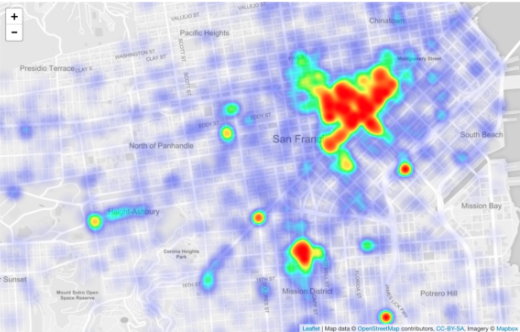


### Que necesito para hacer un Heatmap Geográfico?
- Necesito puntos con coordenadas 

### Cuando Utilizar 
- Quiero tener una idea de que zonas tienen una mayor o menor incidencia de puntos. 
- No quiero mostrar puntos individuales debido a un factor de confidencialidad.
- No me interesa mostrar información con presición. Con un Mapa de Calor no deberíamos buscar presición, si no exploración de nuestros datos. 
- Quiero realizar una presentación de mis datos ante una audiencia. 


### Consejos
- Un Mapa de Calor geográfico rompe las reglas que hemos manejado hasta ahora sobre la intensidad de los colores. En este, colores más "calientes" (naranja, rojo, amarillo, blanco) representarán zonas mas densas/pobladas de nuestros puntos de interés. Mientras que colores mas "frios" (celeste, azul, morado, turquesa, verde) representarán zonas menos densas/pobladas.
- Es común construir animaciones de Mapas de Calor a lo largo de una variable temporal. Esto muestra como van cambiando las "zonas de calor" a lo largo del tiempo.



## En esta clase
### Datos
Información histórica sobre terremotos y su magnitud
### Objetivos
1. Visualizar en que zonas del mundo han sucedido mas terremotos históricamente
2. Visualizar esta información por año en una animación


In [1]:
import pandas as pd
import plotly.express as px

# Algunos ambientes van a necesitar este modo para poder visualizar los graficos de Plotly
import plotly
plotly.offline.init_notebook_mode(connected=True)

In [2]:
df = pd.read_csv('../data/terremotos_mundo.csv')

In [3]:
df['year'] = df['Date'].apply(lambda x: x[-4:])
df

Date  Latitude  Longitude  Magnitude  year
0      01/02/1965   19.2460   145.6160        6.0  1965
1      01/04/1965    1.8630   127.3520        5.8  1965
2      01/05/1965  -20.5790  -173.9720        6.2  1965
3      01/08/1965  -59.0760   -23.5570        5.8  1965
4      01/09/1965   11.9380   126.4270        5.8  1965
...           ...       ...        ...        ...   ...
23407  12/28/2016   38.3917  -118.8941        5.6  2016
23408  12/28/2016   38.3777  -118.8957        5.5  2016
23409  12/28/2016   36.9179   140.4262        5.9  2016
23410  12/29/2016   -9.0283   118.6639        6.3  2016
23411  12/30/2016   37.3973   141.4103        5.5  2016

[23412 rows x 5 columns]

In [10]:
# Heatmaps con Plotly
# https://plotly.com/python/mapbox-density-heatmaps/
# https://plotly.com/python-api-reference/generated/plotly.express.density_mapbox.html
fig = px.density_map(
    df, 
    lat='Latitude', 
    lon='Longitude', 
    z='Magnitude', # Introduce la magnitud como factor para determinar zonas calientes, no solamente la incidencia de puntos
    radius=5,
    opacity=0.8,
    center={"lat":11.57, "lon":-24.67}, 
    zoom=0,
    map_style="carto-positron",
    color_continuous_scale='inferno',
    animation_group='year',
    animation_frame='year'
)


fig.update_layout(
    margin={"r":0,"t":0,"t":0,"b":0}
)


In [9]:
fig = px.density_map(
    df, 
    lat='Latitude', 
    lon='Longitude', 
    radius=5,
    center=dict(lat=0, lon=180), 
    zoom=0,
    map_style="carto-positron",
    animation_group='year',
    animation_frame='year'
)


fig.update_layout(
    margin={"r":0,"t":0,"l":0,"b":0},
    coloraxis_colorbar={
        "ticks":"outside",
        "title":"Terremotos"
    }
)
